In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [5]:
outputs = np.unique(train_labels).shape[0]

In [10]:
def vis_img(data):
  plt.figure(figsize=(5, 5))
  for i in range(15):
      plt.subplot(5, 5, i + 1)
      plt.imshow(train_images[i], cmap='gray')
      plt.title(f"Label: {train_labels[i]}", fontsize=10)
      plt.axis('off')
  plt.tight_layout()

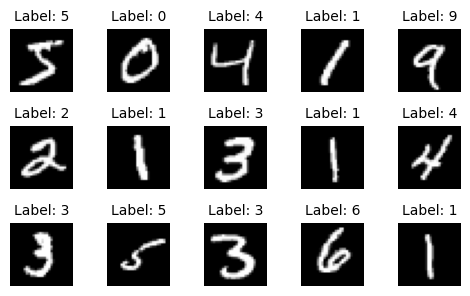

In [11]:
vis_img(train_images)

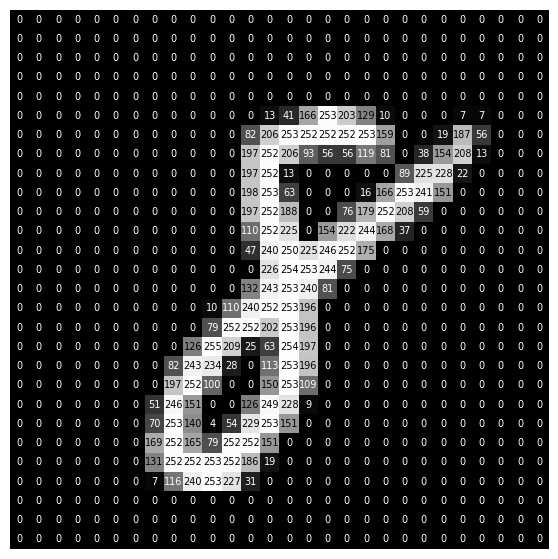

In [25]:
plt.figure(figsize=(7,7))
plt.imshow(train_images[197], cmap="gray")
plt.axis("off")
rows, cols = train_images[197].shape
for i in range(rows):
    for j in range(cols):
        if train_images[197][i, j] > 120:
            plt.text(j, i, str(train_images[197][i, j]), ha='center', va='center', color='black', fontsize=7);
        else:
            plt.text(j, i, str(train_images[197][i, j]), ha='center', va='center', color='white', fontsize=7);

### Encoding

In [12]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

### Standardizasyon

In [14]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

### Modelleme

In [15]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(units=128, activation="relu", name="layer_1"),
    Dense(units=outputs, activation="softmax", name="output_layer")
])

model.compile(
    loss= "categorical_crossentropy",
    optimizer="adam",
    metrics= [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(train_images, train_labels, epochs=15, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/15
469/469 [==============================] - 2s 2ms/step - loss: 0.3574 - precision: 0.9474 - recall: 0.8501 - accuracy: 0.9017 - val_loss: 0.1924 - val_precision: 0.9590 - val_recall: 0.9333 - val_accuracy: 0.9439
Epoch 2/15
469/469 [==============================] - 1s 2ms/step - loss: 0.1679 - precision: 0.9636 - recall: 0.9419 - accuracy: 0.9525 - val_loss: 0.1415 - val_precision: 0.9674 - val_recall: 0.9510 - val_accuracy: 0.9577
Epoch 3/15
469/469 [==============================] - 1s 2ms/step - loss: 0.1197 - precision: 0.9738 - recall: 0.9597 - accuracy: 0.9664 - val_loss: 0.1127 - val_precision: 0.9746 - val_recall: 0.9612 - val_accuracy: 0.9665
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0920 - precision: 0.9795 - recall: 0.9686 - accuracy: 0.9737 - val_loss: 0.1000 - val_precision: 0.9754 - val_recall: 0.9663 - val_accuracy: 0.9694
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0747 - precision: 0.9831 - r

### Model Başarısı Değerlendirme

Text(0, 0.5, 'Loss')

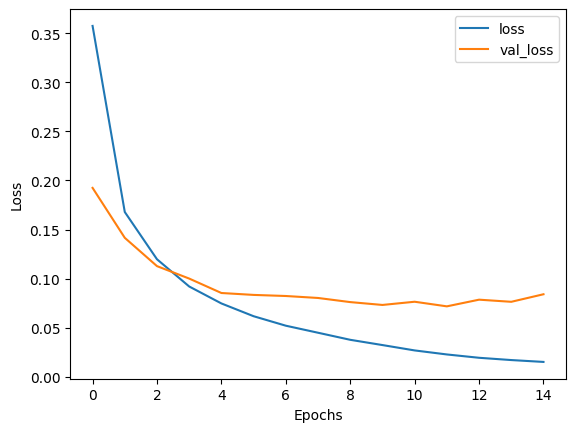

In [18]:
loss = pd.DataFrame(model.history.history)[["loss","val_loss"]]
loss.plot();
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

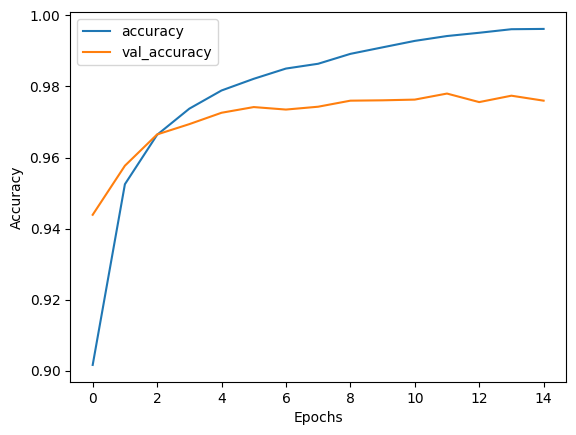

In [19]:
acc = pd.DataFrame(model.history.history)[["accuracy","val_accuracy"]]
acc.plot();
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [20]:
eval = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 947us/step - loss: 0.0841 - precision: 0.9778 - recall: 0.9748 - accuracy: 0.9760


In [21]:
pd.DataFrame(data=eval, index=["loss","precision","recall","accuracy"], columns=["Test Skorları"])

,Test Skorları
loss,0.084057
precision,0.977831
recall,0.974800
accuracy,0.976000


### Modeli Kaydetme

In [22]:
model.save("mnist_model.h5")

### Tahmin Yapmak

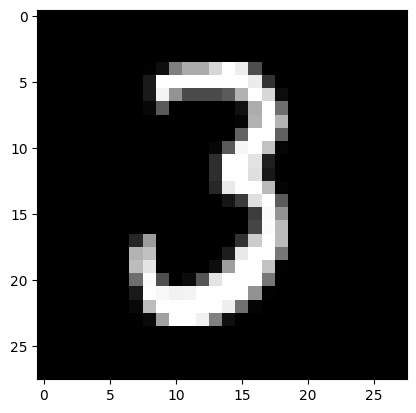

In [83]:
sayi = np.random.randint(0, test_images.shape[0])
test_img = test_images[sayi]
test_gercek = test_labels[sayi]
plt.imshow(test_img.reshape(28, 28), cmap="gray");

In [84]:
test_data = test_images[sayi].reshape(1, 28, 28, 1)
prob = model.predict(test_data, verbose=0)

tahmin = np.argmax(prob)
dogruluk = np.max(prob)
print(f"Tahmin: {tahmin}")
print(f"Doğruluk: %{dogruluk*100:.2f}")

Tahmin: 3
Doğruluk: %99.90
